1. Lý thuyết:

  1. Chứng minh rằng nếu $\mathbf{A}$ là một ma trận vuông thì $\mathbf{A} + \mathbf{A}^{\top}$ là một ma trận đối xứng.

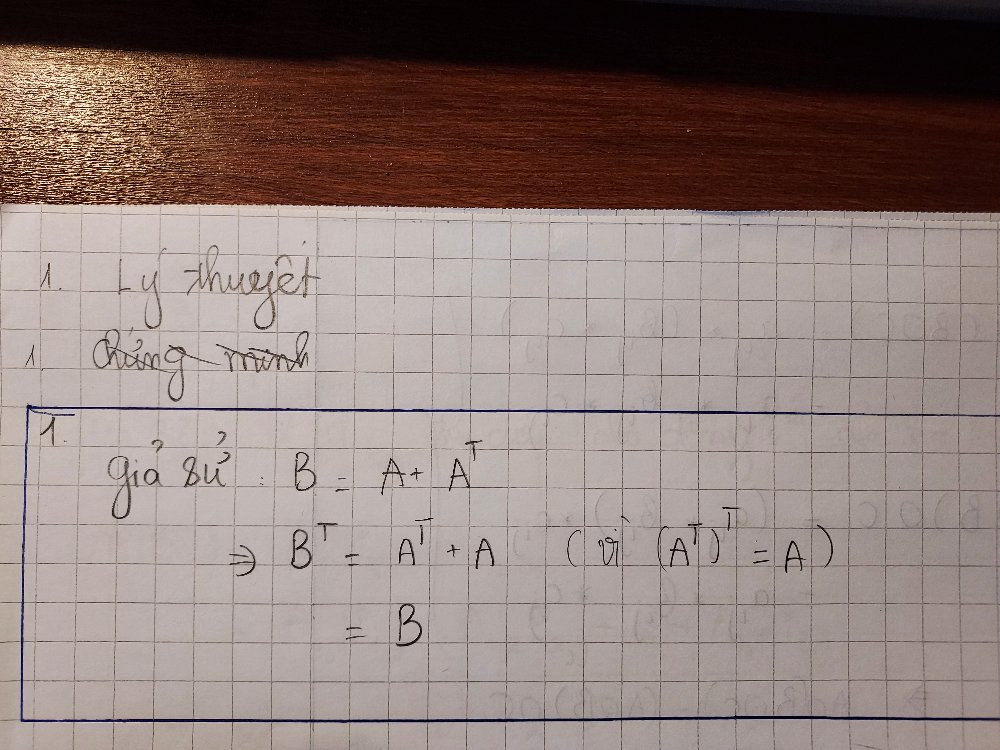




2. Cho $\mathbf{A}, \mathbf{B}, \mathbf{C}$ là ba ma trận có kích thước lần lượt là $m \times n$, $n \times p$ và $p \times q$ chứng minh rằng $\mathbf{ABC} = (\mathbf{A}\mathbf{B})\mathbf{C} = \mathbf{A}(\mathbf{B}\mathbf{C})$
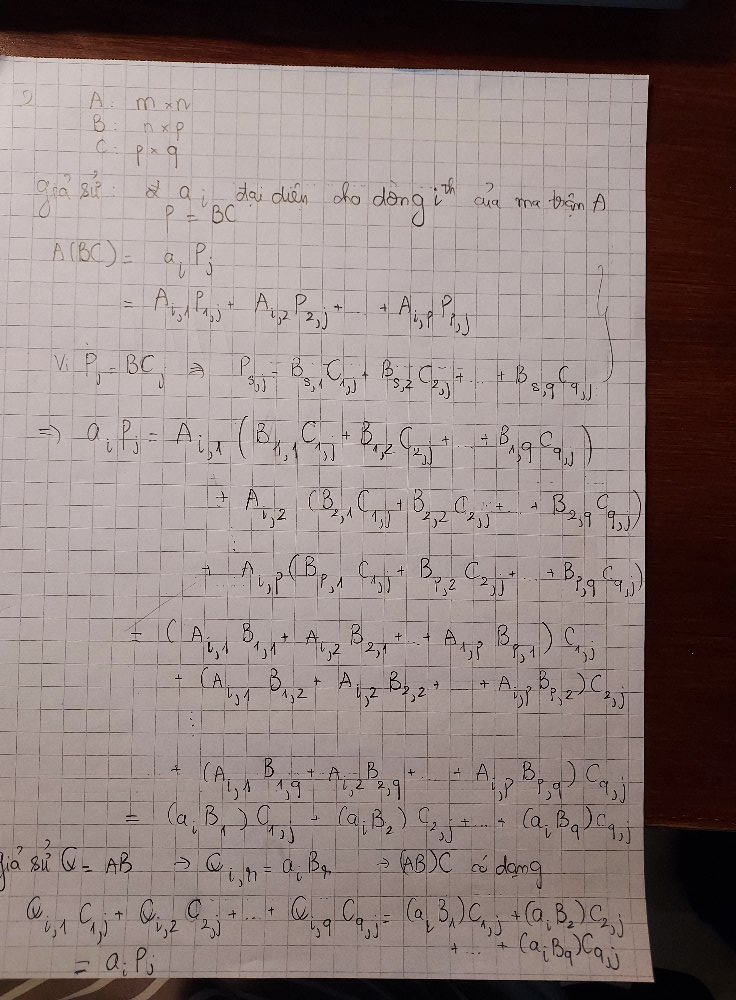

3. $\mathbf{trace}$ của ma trận là tổng các phần tử nằm trên đường chéo chính ( phần tử mà có index dòng bằng cột). Chứng minh rằng: $\mathbf{trace(AB) = trace(BA)}$

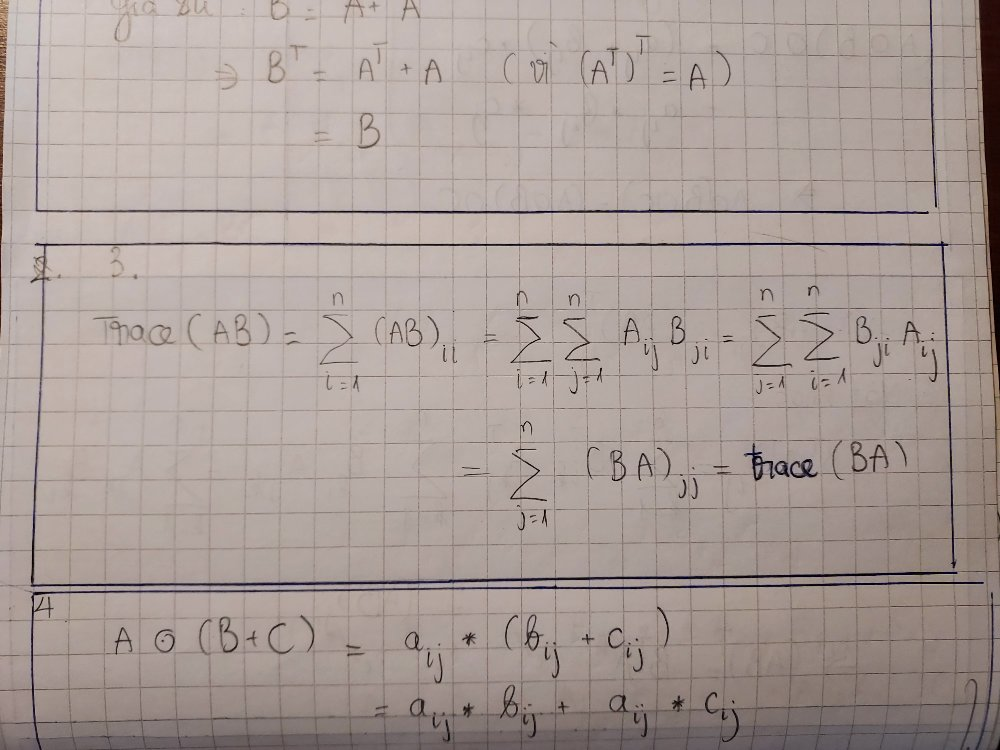

4. Chứng minh: $\mathbf{A} \odot \mathbf{(B+C)} = \mathbf{A} \odot \mathbf{B} + \mathbf{A} \odot \mathbf{C}$

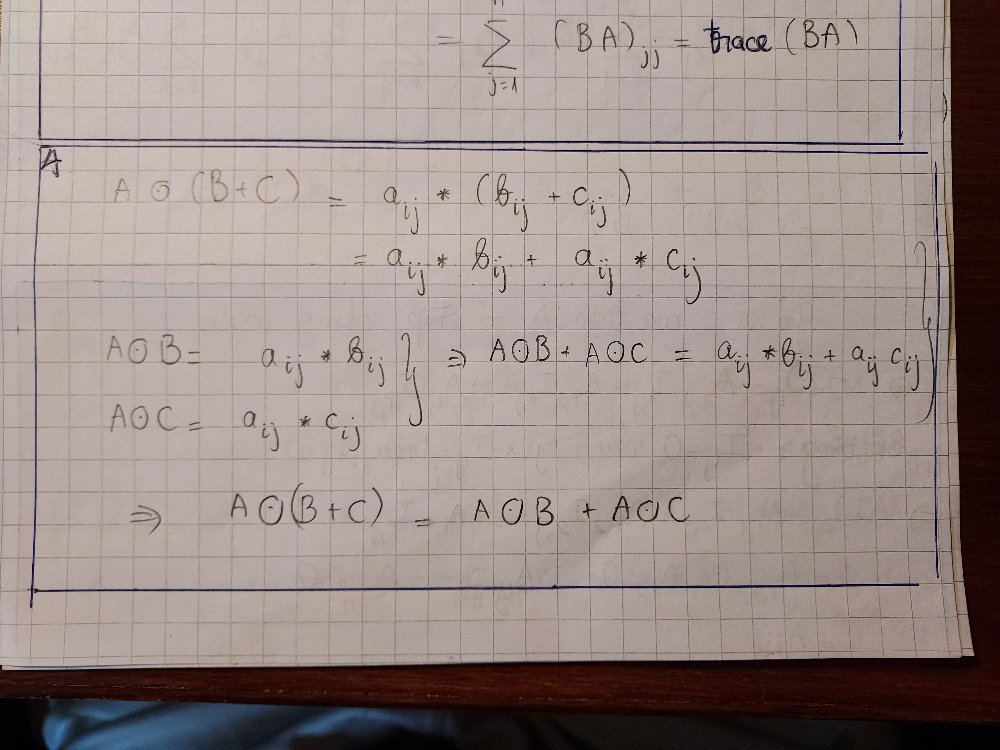

5. Chứng minh: $\mathbf{A} \odot (\mathbf{B} \odot \mathbf{C})= (\mathbf{A} \odot \mathbf{B}) \odot \mathbf{C}$

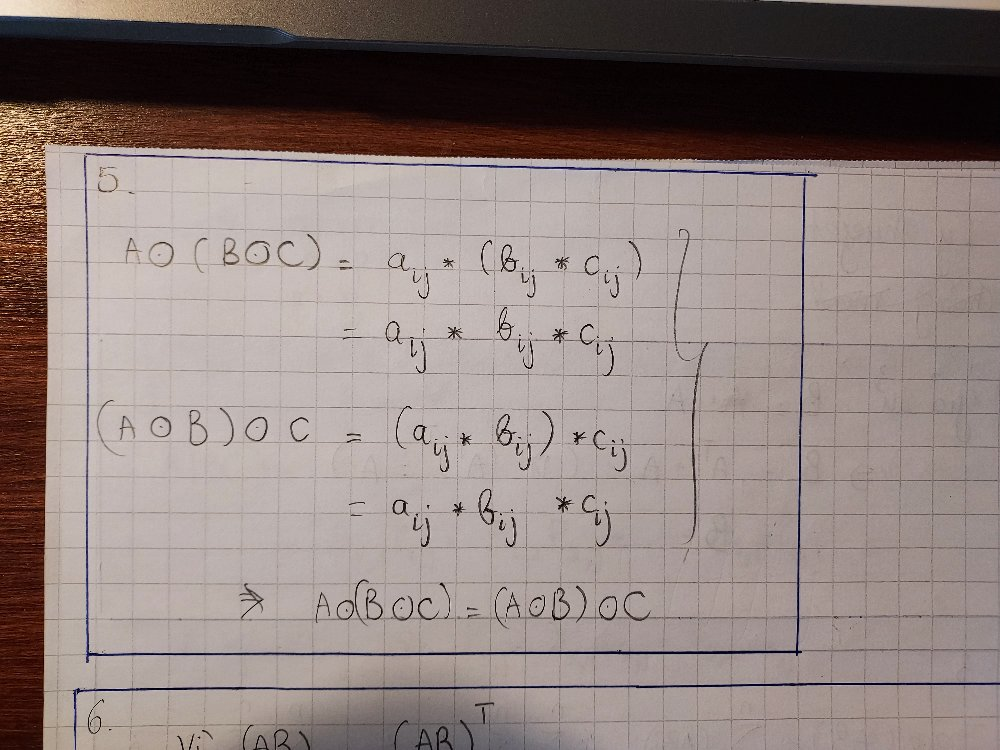

6. Chứng mình rằng: $$(\mathbf{A}\mathbf{B})^{\intercal} = \mathbf{B}^{\intercal}\mathbf{A}^{\intercal}$$

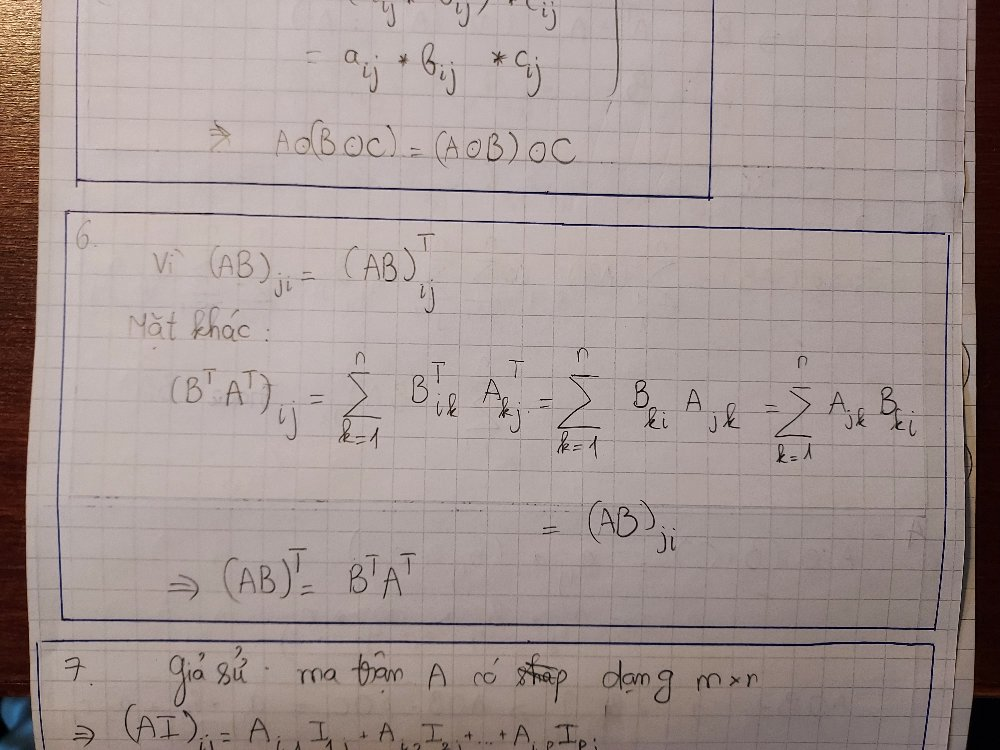

7. Chứng minh: $$\mathbf{A}\mathbf{I} = \mathbf{A}$$
Trong đó $\mathbf{I}$ là ma trận đơn vị.
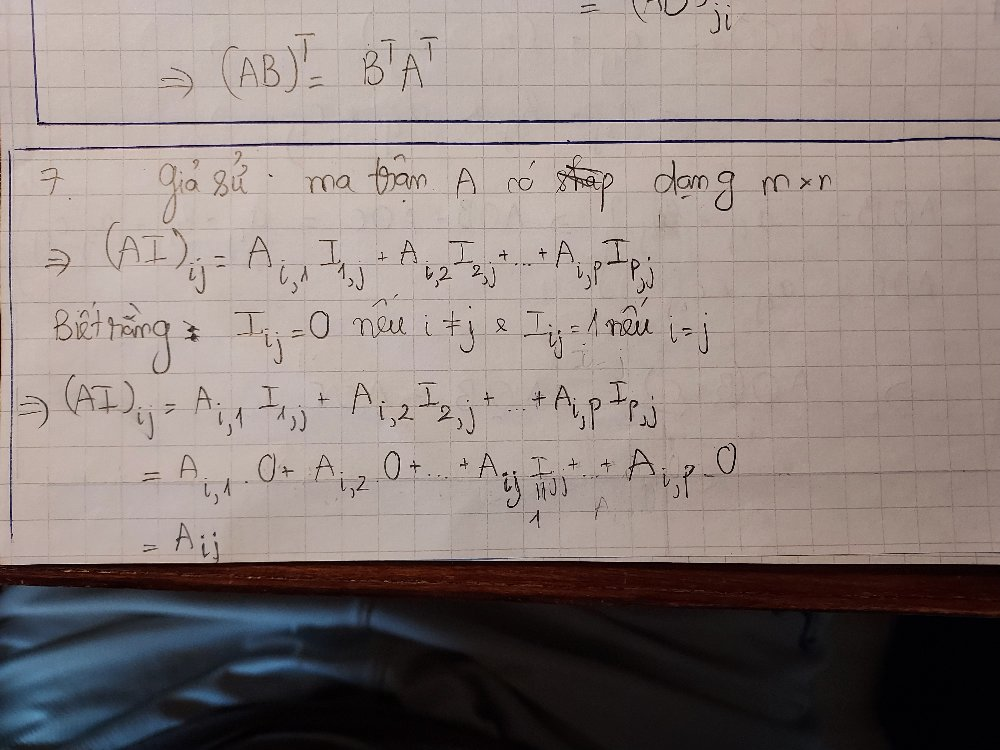

2. Thực hành:

  1. Khởi tạo một số vô hướng, một véc tơ có độ dài là 3 và một ma trận bất kỳ có kích thước là 2×3 trên numpy.
  2. Tính tích giữa véc tơ và ma trận.
  3. Tính tổng các dòng và tổng các cột của ma trận.

In [1]:
# 1
import numpy as np

scalar = np.float16("0.1") 
#print(scalar)
vector = np.random.random(3)
#print(vector)
matrix = np.random.rand(2,3)
#print(matrix)

In [2]:
# 2
print(matrix.dot(vector))

[0.58645396 0.30826847]


In [3]:
# 3
sum_row = matrix.sum(axis=0)
print(sum_row)
sum_column = matrix.sum(axis=1)
print(sum_column)

[1.14568172 1.65023192 0.31171745]
[1.79899655 1.30863455]


  4. Cho hai véc tơ.

In [4]:
import numpy as np
x = np.array([1.0, 2.5, 2.0, 5.0])
y = np.array([2.0, 4.0, 2.5, 4.5])



In [5]:
import math
def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
  return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))

print(angle(x,y))

0.2762242950454787


  5. Cho bộ dữ liệu fashion mnist gồm các bức ảnh thuộc về 10 loại quần áo khác nhau, chúng ta trích xuất ra chỉ hai loại quần áo nhãn 0 và 1.

In [6]:
import tensorflow as tf
import numpy as np
# Load data from tensorflow.keras.datasets
((train_images, train_labels), (
    test_images, test_labels)) = tf.keras.datasets.fashion_mnist.load_data()

# Create train and test dataset via zip function
train = list(zip(train_images, train_labels)) # zip function will compress each element of two equal-length list, which have the same index position, into a element of output list.
test = list(zip(test_images, test_labels))

X_train_0 = np.stack([x[0] for x in train if x[1] == 0]).astype(float) # tensor images of class 0. Having shape: batch_size x width x height
X_train_1 = np.stack([x[0] for x in train if x[1] == 1]).astype(float) # tensor images of class 1. Having shape: batch_size x width x height
X_test = np.stack(
    [x[0] for x in test if x[1] == 0 or x[1] == 1]).astype(float)
y_test = np.stack(
    [x[1] for x in test if x[1] == 0 or x[1] == 1]).astype(float)

print('X_train_0: {}, X_train_1: {}'.format(X_train_0.shape, X_train_1.shape))
print('X_test: {}, y_test: {}'.format(X_test.shape, y_test.shape))

4431872/4422102 [==============================] - 0s 0us/step
X_train_0: (6000, 28, 28), X_train_1: (6000, 28, 28)
X_test: (2000, 28, 28), y_test: (2000,)


In [7]:
# Reshape each image into a vector 28x28 = 784 dimension
X_train_0 = np.reshape(X_train_0, (-1, 28*28))
X_train_1 = np.reshape(X_train_1, (-1, 28*28))
X_test = np.reshape(X_test, (-1, 28*28))

print('X_train_0: {}, X_train_1: {}'.format(X_train_0.shape, X_train_1.shape))
print('X_test: {}, y_test: {}'.format(X_test.shape, y_test.shape))

X_train_0: (6000, 784), X_train_1: (6000, 784)
X_test: (2000, 784), y_test: (2000,)


In [15]:
column_means_X_train_0 = X_train_0.mean(axis=0)
column_means_X_train_1 = X_train_1.mean(axis=0)
mid_point_center = (column_means_X_train_0 - column_means_X_train_1) / 2

In [16]:
predicted_X_test = []
for element in X_test:
  value = np.multiply((column_means_X_train_0 - column_means_X_train_1), element) - mid_point_center
  if np.sum(value) > 0:
    predicted_X_test.append(0)
  elif np.sum(value) < 0:
    predicted_X_test.append(1)
  else:
    print(value)


In [20]:
count = 0
for i, j in zip(predicted_X_test, y_test):
  if i == j:
      count +=1 
precision = count/len(y_test) * 100

print(f'The precision of prediction using mid-poing center hyperplane is {precision}% ') 
    



The precision of prediction using mid-poing center hyperplane is 89.35% 
